![Image of American Family](https://www.wheniscalendars.com/wp-content/uploads/2017/08/American-Family-Day.jpg)


# Project 1: Common Words and Sentiment Analysis for American Family-Related Happy Moments
In this project, I seek to explore the differences between different happy moments in the United States, separated by familial roles. In particular, I hope to use the distribution of these happy moments and the different words associated with them to come up with conjectures about the American household, and comment on the seemingly changing role of gender and age in the nuclear family. Then, comparing to similar data from India, we can observe a comparison between American happy moments with family and Indian happy moments in order to create further conjectures about American culture surrounding happiness.

## Setup: Importing packages and cleaning data

Data is filtered so it only includes responses from the United States, and other ambiguous responses are cleared.

In [188]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
os.chdir("C:\\Users\\Jason\\Documents\\GitHub\\Spring2019-Proj1-ynomir50\\")

data = pd.read_csv("output\\processed_moments.csv")
data.age = data.age.replace("prefer not to say", np.nan)
data.age = data.age.replace("60yrs", 60)
data.age = pd.to_numeric(data.age)

INDdata = data[data.country == "IND"].reset_index().drop(["index"], axis = 1)
INDdata.text = INDdata.text.str.split()
data = data[data.country == "USA"].reset_index().drop(["index"], axis = 1)
data.text = data.text.str.split()



## Part 1: Separation by Family Member Type

Using an array of synonyms for each family relation, I create subsets of the original dataset in order to create plots describing each subset of happy moments regarding each family member.

In [171]:
momwords = ["mom", "mother", "mama", "mum", "mommy"]
dadwords = ["dad", "father", "daddy", "pops"]
gfwords = ["grandpa", "grandfather"]
gmwords = ["grandma", "grandmother"]
childwords = ["son", "daughter", "child", "kid"]

allMom = pd.DataFrame()
for i in data.text.iteritems():
    if type(i[1]) is list:
        for k in momwords:
            if(k in i[1]):
                allMom = allMom.append(data.iloc[i[0]])

allDad = pd.DataFrame()
for i in data.text.iteritems():
    if type(i[1]) is list:
        for k in dadwords:
            if(k in i[1]):
                allDad = allDad.append(data.iloc[i[0]])

allGF = pd.DataFrame()
for i in data.text.iteritems():
    if type(i[1]) is list:
        for k in gfwords:
            if(k in i[1]):
                allGF = allGF.append(data.iloc[i[0]])

allGM = pd.DataFrame()
for i in data.text.iteritems():
    if type(i[1]) is list:
        for k in gmwords:
            if(k in i[1]):
                allGM = allGM.append(data.iloc[i[0]])
                
allchild = pd.DataFrame()
for i in data.text.iteritems():
    if type(i[1]) is list:
        for k in childwords:
            if(k in i[1]):
                allchild = allchild.append(data.iloc[i[0]])
                

## Part 2: Graphical Analysis
For initial analysis, I create Wordclouds for each subset to examine what words or actions seem most prevalent in relation to each family member. Firstly, to compare I show the Wordcloud of the original set:

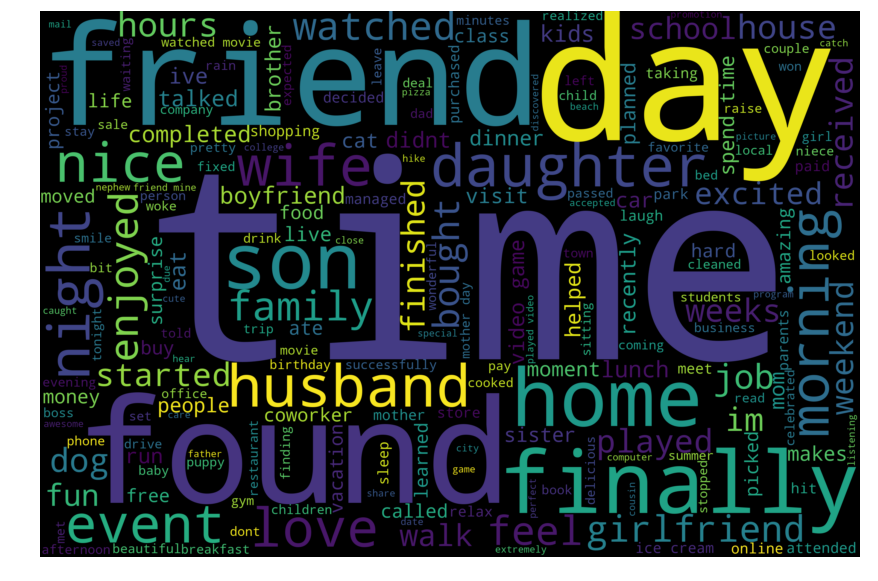

In [172]:
alltext = " "
for i in data.text.iteritems():
    alltext = alltext + " " + " ".join(str(x) for x in i[1])
    
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(alltext)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

From an initial look, it seems that outside of typical words that could apply to any situation such as "time," "day," or "found," certain other personal roles such as "friend," "husband," and "wife" show up more often than many other familial roles.


Next, we observe each other scatterplot:

### Mom:


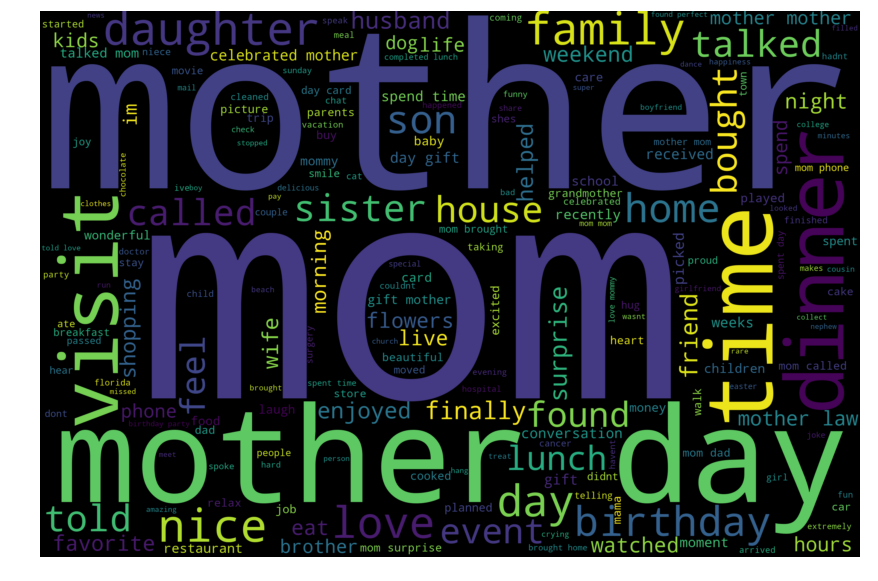

In [173]:
alltext = " "
for i in allMom.text.iteritems():
    alltext = alltext + " " + " ".join(str(x) for x in i[1])
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(alltext)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### Dad:

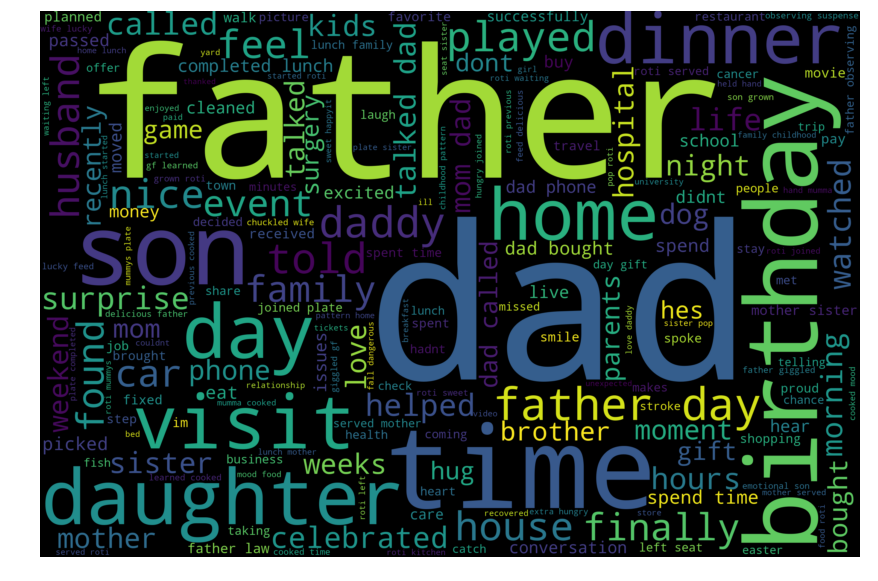

In [174]:
alltext = " "
for i in allDad.text.iteritems():
    alltext = alltext + " " + " ".join(str(x) for x in i[1])
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(alltext)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### Grandfather:


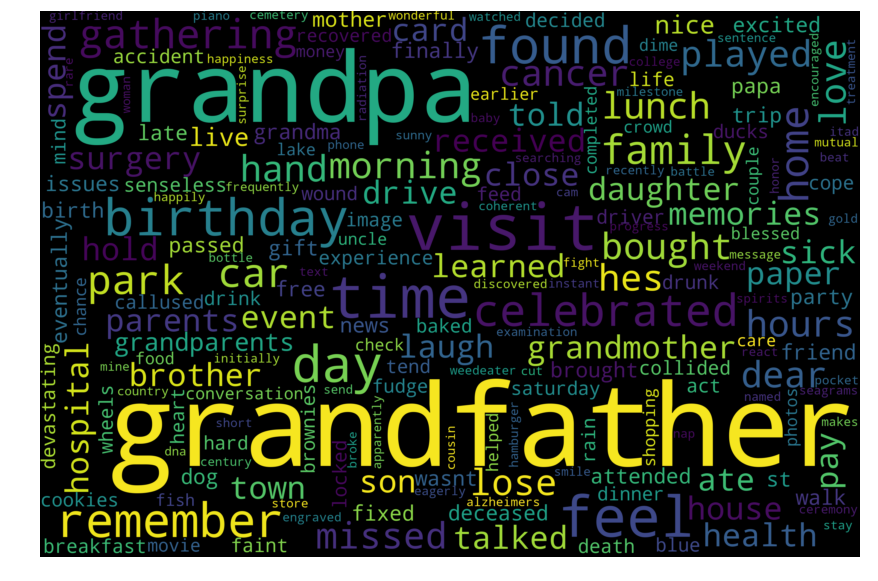

In [175]:
alltext = " "
for i in allGF.text.iteritems():
    alltext = alltext + " " + " ".join(str(x) for x in i[1])
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(alltext)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### Grandmother:

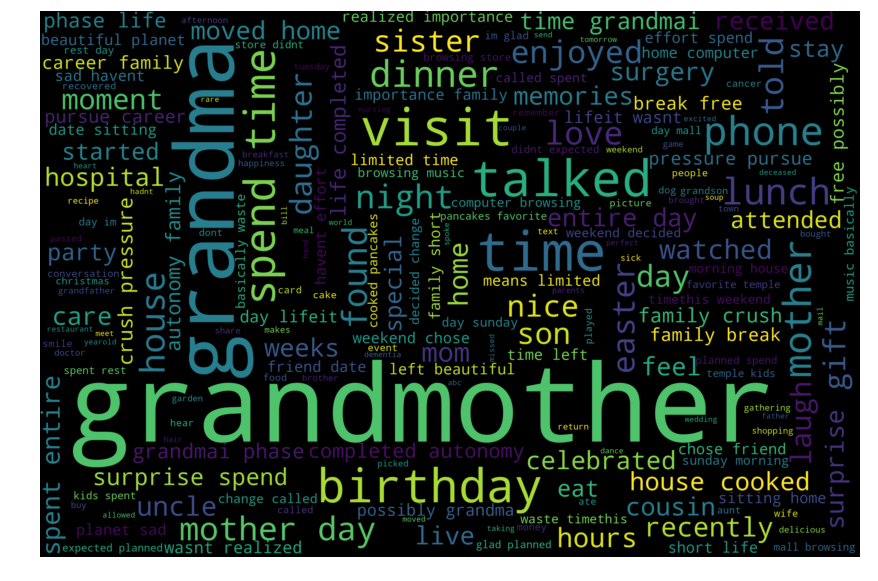

In [176]:
alltext = " "
for i in allGM.text.iteritems():
    alltext = alltext + " " + " ".join(str(x) for x in i[1])
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(alltext)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## Child:

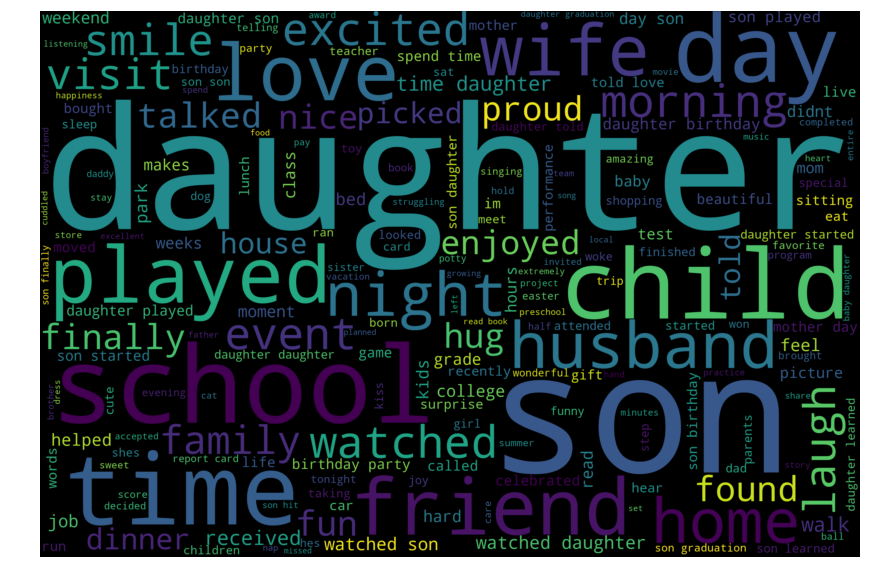

In [177]:
alltext = " "
for i in allchild.text.iteritems():
    alltext = alltext + " " + " ".join(str(x) for x in i[1])
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(alltext)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

From these scatterplots we can make a few observations:
* Happy statements involving mothers and fathers often involve the home and house settings, and especially refer to dinnertime as the time when the happy moment occurred.
* Happy statements involving grandparents understandably most involve health and visits. Tangentially, one might see grandparents as more isolated from the nuclear family, and many happy moments most likely involve the upturn of their personal health.
* Happy statements involving children most often involve school or play, showing that many American parents are quite involved in the day-to-day activities of their children.

Next, we create bar graphs for each subset of data to look over demographics of respondents.

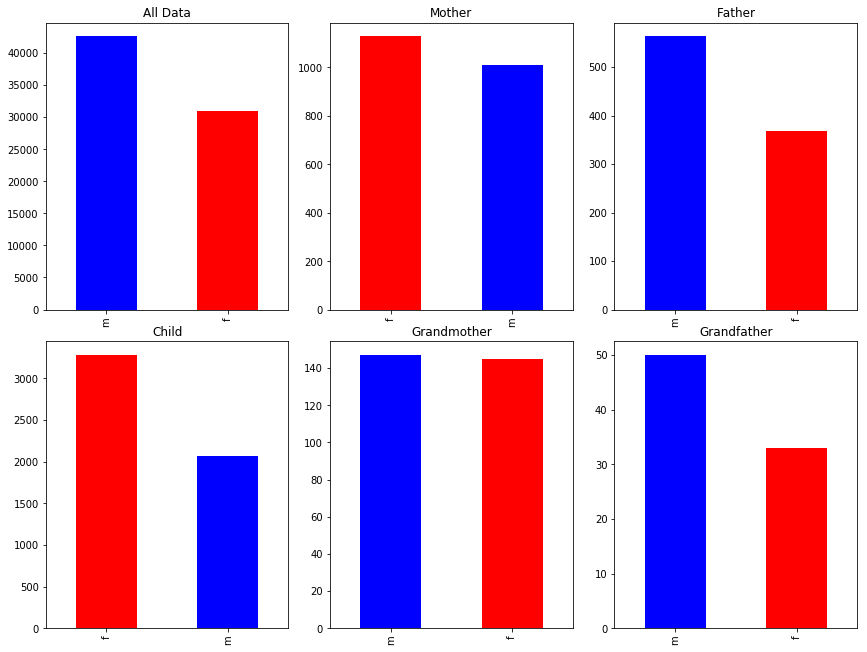

In [178]:
fig, axes = plt.subplots(nrows=2, ncols=3)
fig.tight_layout()
data.gender.value_counts().plot(kind = 'bar', ax = axes[0,0], color = ['b', 'r'], title = "All Data")
allMom.gender.value_counts().plot(kind = 'bar', ax = axes[0,1], color = ['r', 'b'], title = "Mother")
allDad.gender.value_counts().plot(kind = 'bar', ax = axes[0,2], color = ['b', 'r'], title = "Father")
allchild.gender.value_counts().plot(kind = 'bar', ax = axes[1,0], color = ['r', 'b'], title = "Child")
allGM.gender.value_counts().plot(kind = 'bar', ax = axes[1,1], color = ['b', 'r'], title = "Grandmother")
allGF.gender.value_counts().plot(kind = 'bar', ax = axes[1,2], color = ['b', 'r'], title = "Grandfather")
plt.show()

While the majority of the data is male-skewed, it is most interesting that the gender makeup of those who submitted happy events pertaining children are predominantly female. This shows that the ties between women and their children in the United States might still be significantly more prevalent those of men and their children, pointing to a domestic makeup where women are still more responsible for children in a household.

Though the sample size of happy events pertaining to grandmothers and grandfathers is small, grandfather events seem to be written at a comparable proportion to all events, while grandmother events are skewed more evenly. 

Lastly, mother events are submitted more by women, while father events are submitted more by men. This might suggest tighter bonds between same-gendered parents and their children, but the proportion of gender responses for father is still about the same as the original proportion of all the data.

In order to further look at the dynamics of the American family, we look at age distribution to see where most of the data comes from:

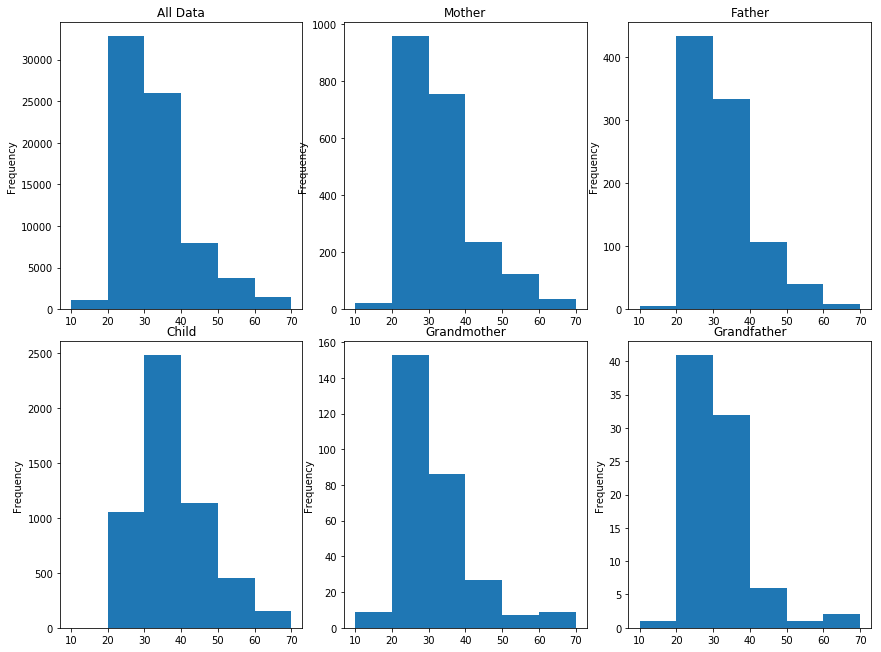

In [179]:
fig, axes = plt.subplots(nrows=2, ncols=3)
fig.tight_layout()
data.age.plot(kind = 'hist', bins = [10, 20, 30, 40, 50, 60, 70], ax = axes[0,0], title = "All Data")
allMom.age.plot(kind = 'hist', bins = [10, 20, 30, 40, 50, 60, 70], ax = axes[0,1], title = "Mother")
allDad.age.plot(kind = 'hist', bins = [10, 20, 30, 40, 50, 60, 70], ax = axes[0,2], title = "Father")
allchild.age.plot(kind = 'hist', bins = [10, 20, 30, 40, 50, 60, 70], ax = axes[1,0], title = "Child")
allGM.age.plot(kind = 'hist', bins = [10, 20, 30, 40, 50, 60, 70], ax = axes[1,1], title = "Grandmother")
allGF.age.plot(kind = 'hist', bins = [10, 20, 30, 40, 50, 60, 70], ax = axes[1,2], title = "Grandfather")

plt.show()



Though most of the age distributions of data subsets are relatively skewed similarly to the distribution of the entire dataset, the age distribution of respondents who talked about children is notably skewed towards older respondents. Understandably, in the United States more people who are discussing their children as sources of happiness are at an age where they have resources to care for their children.

## Part 3: Sentiment Analysis and Country Comparison
![America India](https://s3.india.com/wp-content/uploads/2015/07/india-and-us-flag-001122.jpg)


Though we may have identified the subject or object of the happy event, we can now take a step further and incorporate the action or emotion in the happy event by first looking at the variable "ground_truth_category," as well as comparing results to those of those from India in order to show how the American family experiences happiness relative to other countries.



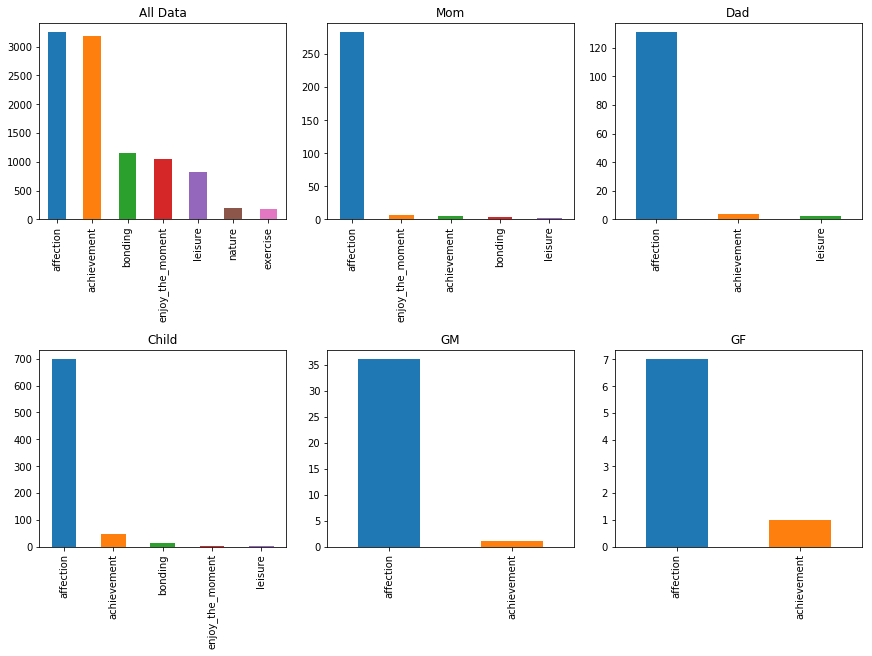

In [191]:
fig, axes = plt.subplots(nrows=2, ncols=3, constrained_layout = True)
data.ground_truth_category.value_counts().plot(kind = 'bar', ax = axes[0, 0], title = "All Data")
allMom.ground_truth_category.value_counts().plot(kind = 'bar', ax = axes[0, 1], title = "Mom")
allDad.ground_truth_category.value_counts().plot(kind = 'bar', ax = axes[0, 2], title = "Dad")
allchild.ground_truth_category.value_counts().plot(kind = 'bar', ax = axes[1, 0], title = "Child")
allGM.ground_truth_category.value_counts().plot(kind = 'bar', ax = axes[1, 1], title = "Grandmother")
allGF.ground_truth_category.value_counts().plot(kind = 'bar', ax = axes[1, 2], title = "Grandfather")
plt.show()



As one might expect, the majority of interactions with family members are related to affection, and there is a surprisingly low proportion of "bonding" interactions between family members. In comparison, we look at the data for India:

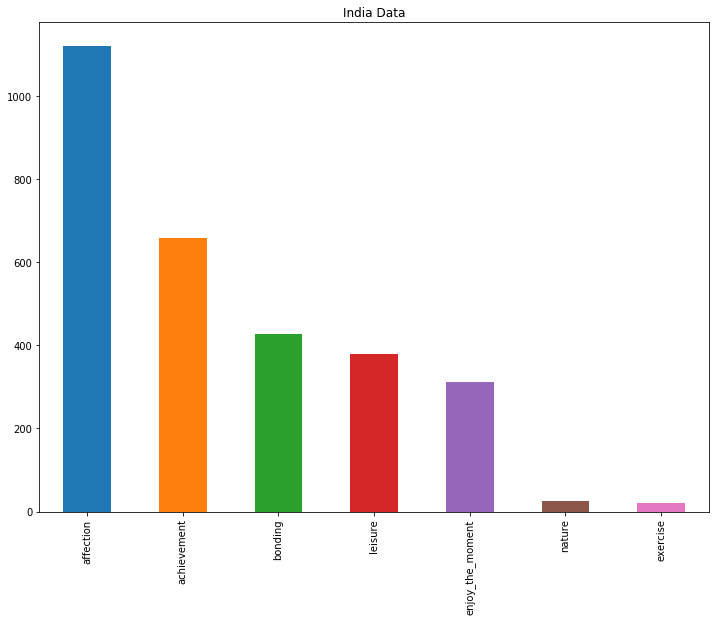

In [192]:
INDdata.ground_truth_category.value_counts().plot(kind = 'bar', title = "India Data")
plt.show()

Contrary to what one might expect, India has a much lower proportion of "achievement" related happy events. Separating by similar familial categories, we see bar charts for India's categories:

In [193]:
allMomI = pd.DataFrame()
for i in INDdata.text.iteritems():
    if type(i[1]) is list:
        for k in momwords:
            if(k in i[1]):
                allMomI = allMomI.append(data.iloc[i[0]])

allDadI = pd.DataFrame()
for i in INDdata.text.iteritems():
    if type(i[1]) is list:
        for k in dadwords:
            if(k in i[1]):
                allDadI = allDadI.append(data.iloc[i[0]])

allGFI = pd.DataFrame()
for i in INDdata.text.iteritems():
    if type(i[1]) is list:
        for k in gfwords:
            if(k in i[1]):
                allGFI = allGFI.append(data.iloc[i[0]])

allGMI = pd.DataFrame()
for i in INDdata.text.iteritems():
    if type(i[1]) is list:
        for k in gmwords:
            if(k in i[1]):
                allGMI = allGMI.append(data.iloc[i[0]])
                
allchildI = pd.DataFrame()
for i in INDdata.text.iteritems():
    if type(i[1]) is list:
        for k in childwords:
            if(k in i[1]):
                allchildI = allchildI.append(data.iloc[i[0]])


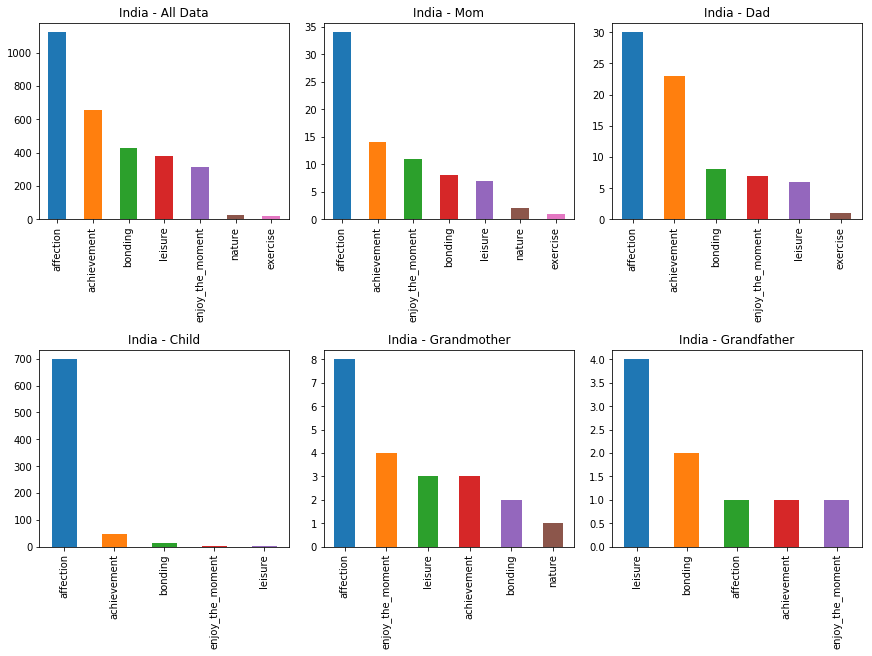

In [194]:
               
fig, axes = plt.subplots(nrows=2, ncols=3, constrained_layout = True)
INDdata.ground_truth_category.value_counts().plot(kind = 'bar', ax = axes[0, 0], title = "India - All Data")
allMomI.ground_truth_category.value_counts().plot(kind = 'bar', ax = axes[0, 1], title = "India - Mom")
allDadI.ground_truth_category.value_counts().plot(kind = 'bar', ax = axes[0, 2], title = "India - Dad")
allchild.ground_truth_category.value_counts().plot(kind = 'bar', ax = axes[1, 0], title = "India - Child")
allGMI.ground_truth_category.value_counts().plot(kind = 'bar', ax = axes[1, 1], title = "India - Grandmother")
allGFI.ground_truth_category.value_counts().plot(kind = 'bar', ax = axes[1, 2], title = "India - Grandfather")
plt.show()
                

Compared to the data from the United States, it is clear that while India has a lower proportion of "achievement" related happy moments compared to the United States, this is not the case with family-related happy moments. Whereas the United States data has very few happy moments related to both family members and achievement, India has a large proportion of achievements related to all family members outside of children, where it mirrors proportions of the US. This indicates that the United States has many more achievement-based happy moments that are related to _individual achievement_ and _achievement between non-family members_, which might seem counter-intuitive based on common stereotypes of Asian and American cultures.

## Conclusions
![America Family](https://www.blackenterprise.com/wp-content/blogs.dir/1/files/2013/12/Young-Black-Family-at-Park.jpg)
![India Family](https://qph.fs.quoracdn.net/main-qimg-644049ed9790879d32688f7649728473)


In the first part of the analysis, we discovered the settings and related words under which American families experience happy emotions, and that there is still a large gender imbalance between women and men enjoying happy moments with their children. Related phrases and words of these happy moments reveal that the happy moments of most American families still follow the pattern as if they enjoyed these moments under the "nuclear" family model, where parents and children most likely encounter happy moments in their common activities such as dinner, and grandparents are often relegated to happy moments involving their health and visits.

Next, the comparison of these types of moments to data from India showed that much of the happy moments based on achievement in American culture are relatively separate from family, pointing to a distinct American culture of independence and achievement when compared to India. Using these two analyses, one can make preliminary hypotheses and conjectures about the culture of family, happiness, and achievement in America compared to other countries such as India.
